In [1]:
# connecting collab with google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Problem Statement**

Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.

 

In most cases, customers get to know of such unauthorised transactions happening through their cards quite late as they are unaware of such ongoing credit card frauds or they do not monitor their bank account activities closely. This has led to late complaint registration with Finex and by the time the case is flagged fraudulent, the bank incurs heavy losses and ends up paying the lost amount to the cardholders.

 

Now, Finex is also not really equipped with the latest financial technologies, and it is becoming difficult for the bank to track these data breaches on time to prevent further losses. The Branch Manager is worried about the ongoing situation and wants to identify the possible root causes and action areas to come up with a long-term solution that would help the bank generate high revenue with minimal losses.



### **Project Pipeline**


1. Understanding the Data
2. Exploratory Data Analysis (EDA)
3. Train/Test Data Splitting
4. Model Building or Hyperparameter Tuning
5. Model Evaluation
6. Business Impact


### **Data Dictionary**
- <b>trans_date_trans_time -></b> Transaction time stamp
- <b>cc_num -></b> Credit card number
- <b>merchant -></b> merchant name
- <b>category -></b> transaction category
- <b>amt -></b> Transaction amount
- <b>first -></b> First name of card holder
- <b>last -></b> Last name of card holder
- <b>gender -></b> Sex of card holder
- <b>street -></b> transaction address
- <b>city -></b> transaction city
- <b>state -></b> transaction state
- <b>zip -></b> transaction zipcode
- <b>lat -></b> transaction lattitude
- <b>long -></b> transaction longitude
- <b>city_pop -></b> Population of the city
- <b>job -></b> job of the card holder
- <b>dob -></b> date of birth of card holder
- <b>trans_num -></b> transaction number of transaction
- <b>unix_time -></b> time in unix format
- <b>merch_lat -></b> lattitude of the merchant
- <b>merch_long -></b> longitude of merchant
- <b>is_fraud -></b> nature of transaction (fraud or not fraud)

## **Step 1: Understanding the Data**

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading train and test dataset
train_data = pd.read_csv('/content/gdrive/MyDrive/Credit Card Fraud Detection Project/fraudTrain.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/Credit Card Fraud Detection Project/fraudTest.csv')

In [4]:
# printing top 5 rows
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# dropping the 'Unnamed: 0' column
train_data = train_data.drop('Unnamed: 0', axis=1)

In [6]:
# info about dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
# renaming columns for better understanding

train_data.rename(columns = {"trans_date_trans_time":"transaction_date_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount",
                         "first":"first_name",
                         "last":"last_name",
                         "lat":"latitude",
                         "long":"longitude",
                         "trans_num":"transaction_id",
                         "merch_lat":"merchant_latitude",
                         "merch_long":"merchant_longitude"},
                inplace=True)

In [8]:
# looking at the names of all columns
train_data.columns

Index(['transaction_date_time', 'credit_card_number', 'merchant', 'category',
       'amount', 'first_name', 'last_name', 'gender', 'street', 'city',
       'state', 'zip', 'latitude', 'longitude', 'city_pop', 'job', 'dob',
       'transaction_id', 'unix_time', 'merchant_latitude',
       'merchant_longitude', 'is_fraud'],
      dtype='object')

In [9]:
# shape of dataset
train_data.shape

(1296675, 22)

In [10]:
# Looking for duplicate data
train_data.duplicated().sum()

0

- There is `no duplicate` data in the dataset.

In [11]:
# description of data
train_data.describe(include='all')

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_pop,job,dob,transaction_id,unix_time,merchant_latitude,merchant_longitude,is_fraud
count,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,1274791,NaN,693,14,NaN,352,481,2,983,894,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,4,NaN,4403,131659,NaN,26669,28794,709863,3123,5617,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


In [12]:
# Looking for missing values in dataset
train_data.isna().sum()

transaction_date_time    0
credit_card_number       0
merchant                 0
category                 0
amount                   0
first_name               0
last_name                0
gender                   0
street                   0
city                     0
state                    0
zip                      0
latitude                 0
longitude                0
city_pop                 0
job                      0
dob                      0
transaction_id           0
unix_time                0
merchant_latitude        0
merchant_longitude       0
is_fraud                 0
dtype: int64

- There is `no missing data` in the given dataset.

#### **Data Preprocessing and Cleaning**

In [13]:
# converting 'trans_date_trans_time' and 'dob' into datetime format

train_data['transaction_date_time'] = pd.to_datetime(train_data['transaction_date_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [14]:
# info about data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   transaction_date_time  1296675 non-null  datetime64[ns]
 1   credit_card_number     1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amount                 1296675 non-null  float64       
 5   first_name             1296675 non-null  object        
 6   last_name              1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  latitude               12966

**merchant column**

In [15]:
train_data['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [16]:
# removing fraud prefix from the merchant name
train_data['merchant'] = train_data['merchant'].apply(lambda x: x.split('_')[1])

In [17]:
train_data['merchant'].value_counts()

Kilback LLC                       4403
Cormier LLC                       3649
Schumm PLC                        3634
Kuhn LLC                          3510
Boyer PLC                         3493
                                  ... 
Douglas, DuBuque and McKenzie      775
Treutel-King                       775
Medhurst, Labadie and Gottlieb     759
Reichert-Weissnat                  753
Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

**category column**

In [18]:
train_data['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

**gender column**

In [19]:
train_data['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

**state column**

In [20]:
train_data['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

**job column**

In [21]:
train_data['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

**amount column**

In [22]:
train_data['amount'].value_counts()

1.14       542
1.04       538
1.25       535
1.02       533
1.01       523
          ... 
334.21       1
674.31       1
358.59       1
1159.68      1
255.52       1
Name: amount, Length: 52928, dtype: int64

In [23]:
# description
np.round(train_data['amount'].describe(),2)

count    1296675.00
mean          70.35
std          160.32
min            1.00
25%            9.65
50%           47.52
75%           83.14
max        28948.90
Name: amount, dtype: float64

In [24]:
np.round(train_data['amount'].quantile([.25,.5,.75,.90,.95,.99,1]),2)

0.25        9.65
0.50       47.52
0.75       83.14
0.90      136.67
0.95      196.31
0.99      545.99
1.00    28948.90
Name: amount, dtype: float64

#### **Feature Extraction**

In [25]:
# importing library
from datetime import date

In [26]:
# Extracting age from dob column

train_data['age'] = np.round((train_data['transaction_date_time'] - train_data['dob'])/np.timedelta64(1, 'Y')) 
train_data['age'] = train_data['age'].astype(int)

In [27]:
# top 5 rows
train_data.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,longitude,city_pop,job,dob,transaction_id,unix_time,merchant_latitude,merchant_longitude,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33


In [28]:
# description
np.round(train_data['age'].describe(),2)

count    1296675.0
mean          46.0
std           17.4
min           14.0
25%           33.0
50%           44.0
75%           57.0
max           96.0
Name: age, dtype: float64

In [29]:
# creating new column age_group by binnig age
train_data['age_group'] = pd.cut(train_data.age, [0,20,30,40,50,60,99], labels=['<20','21-30','31-40','41-50','51-60','60+'])
train_data.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,city_pop,job,dob,transaction_id,unix_time,merchant_latitude,merchant_longitude,is_fraud,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31,31-40
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41,41-50
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57,51-60
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52,51-60
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33,31-40


In [30]:
#extracting 'transaction_hour' from transaction_date_time column
train_data['transaction_hour'] = train_data['transaction_date_time'].dt.hour

#extracting 'day of the week' from transaction_date_time column
train_data['transaction_day_of_week'] = train_data['transaction_date_time'].dt.day_name()

#extracting 'year_month' from transaction_date_time column
train_data['transaction_year_month'] = train_data['transaction_date_time'].dt.to_period('M')

In [31]:
train_data.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,transaction_id,unix_time,merchant_latitude,merchant_longitude,is_fraud,age,age_group,transaction_hour,transaction_day_of_week,transaction_year_month
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31,31-40,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41,41-50,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57,51-60,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52,51-60,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33,31-40,0,Tuesday,2019-01


In [32]:
# calulating distance from customer to merchant
lat_diff = abs(train_data['latitude'] - train_data['merchant_latitude'])
long_diff = abs(train_data['longitude'] - train_data['merchant_longitude'])

# between each degree of longitude and latitude is about 69 miles or 110 kilometers.
# apply pythagoras to calculate the displacement

train_data['distance'] = np.round(np.sqrt(pow(lat_diff*110,2)+pow(long_diff*110,2)),2)
train_data['distance'] = train_data['distance'].astype(int)

In [33]:
train_data['distance'].head()

0     96
1     29
2    107
3    101
4     95
Name: distance, dtype: int64

In [34]:
np.round(train_data['distance'].describe(),2)

count    1296675.00
mean          83.73
std           31.32
min            0.00
25%           62.00
50%           87.00
75%          107.00
max          155.00
Name: distance, dtype: float64

In [35]:
# ceating new column city_pop_segment from city_pop for better understanding
train_data['distance_segment'] = pd.cut(train_data.distance, [0,50,100,200], labels=['nearby','far','far_away'])

In [36]:
train_data.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,merchant_latitude,merchant_longitude,is_fraud,age,age_group,transaction_hour,transaction_day_of_week,transaction_year_month,distance,distance_segment
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,31,31-40,0,Tuesday,2019-01,96,far
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,41,41-50,0,Tuesday,2019-01,29,nearby
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,57,51-60,0,Tuesday,2019-01,107,far_away
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,52,51-60,0,Tuesday,2019-01,101,far_away
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,33,31-40,0,Tuesday,2019-01,95,far


In [37]:
# city population description
np.round(train_data['city_pop'].describe(),2)

count    1296675.00
mean       88824.44
std       301956.36
min           23.00
25%          743.00
50%         2456.00
75%        20328.00
max      2906700.00
Name: city_pop, dtype: float64

In [38]:
# ceating new column city_pop_segment from city_pop for better understanding
train_data['city_pop_segment'] = pd.cut(train_data.city_pop, [0,500000,1000000,5000000], labels=['less','moderate','dense'])

In [39]:
train_data.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,merchant_longitude,is_fraud,age,age_group,transaction_hour,transaction_day_of_week,transaction_year_month,distance,distance_segment,city_pop_segment
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,31,31-40,0,Tuesday,2019-01,96,far,less
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,41,41-50,0,Tuesday,2019-01,29,nearby,less
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,57,51-60,0,Tuesday,2019-01,107,far_away,less
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,52,51-60,0,Tuesday,2019-01,101,far_away,less
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,33,31-40,0,Tuesday,2019-01,95,far,less


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   transaction_date_time    1296675 non-null  datetime64[ns]
 1   credit_card_number       1296675 non-null  int64         
 2   merchant                 1296675 non-null  object        
 3   category                 1296675 non-null  object        
 4   amount                   1296675 non-null  float64       
 5   first_name               1296675 non-null  object        
 6   last_name                1296675 non-null  object        
 7   gender                   1296675 non-null  object        
 8   street                   1296675 non-null  object        
 9   city                     1296675 non-null  object        
 10  state                    1296675 non-null  object        
 11  zip                      1296675 non-null  int64         
 12  

## **Step 2: Exploratory Data Analysis (EDA)**

In [41]:
# fraud transaction composition
100*(train_data['is_fraud'].value_counts(normalize=True))

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

- The data is highly imbalance the percentage of `fraud transaction` is only `0.57%` where as `non-fraudulent is 99.4%`.
- Therefore, this is an **`imbalanced dataset`** and there is a need to balance the data, in order to not produce any biases in our analysis.




In [42]:
# creating a new datframe with only fraud transactions for further fraudulent analysis

train_data1 = train_data[train_data['is_fraud']==1]
train_data1.head()

,transaction_date_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,merchant_longitude,is_fraud,age,age_group,transaction_hour,transaction_day_of_week,transaction_year_month,distance,distance_segment,city_pop_segment
2449,2019-01-02 01:06:37,4613314721966,Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-81.179483,1,30,21-30,1,Wednesday,2019-01,76,far,less
2472,2019-01-02 01:47:29,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-99.142791,1,58,51-60,1,Wednesday,2019-01,86,far,dense
2523,2019-01-02 03:05:23,340187018810220,Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.836360,1,58,51-60,3,Wednesday,2019-01,45,nearby,dense
2546,2019-01-02 03:38:03,4613314721966,Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-82.091010,1,30,21-30,3,Wednesday,2019-01,41,nearby,less
2553,2019-01-02 03:55:47,340187018810220,Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.683410,1,58,51-60,3,Wednesday,2019-01,45,nearby,dense


In [43]:
train_data1.shape

(7506, 30)

**amount vs fraud_transactions**

In [44]:
train_data1['amount'].describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amount, dtype: float64

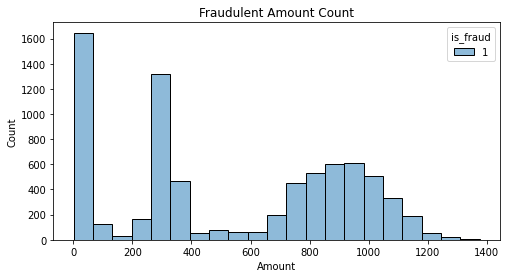

In [45]:
# plotting histogram
plt.figure(figsize=(8,4))
sns.histplot(data = train_data1, x='amount', hue='is_fraud')
plt.title('Fraudulent Amount Count')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

**Observation:**
- The majority of the fraud is done with amount less than $100.
- Since the fraudulent amount is that less thus, may be little difficult to keep track of it.
___

**fraud_amount vs gender**

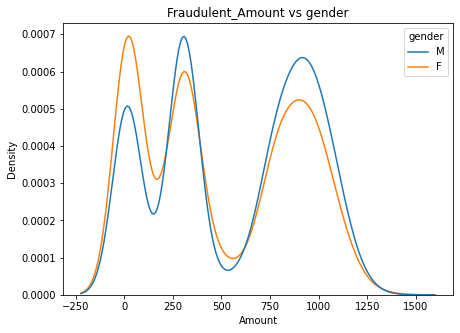

In [46]:
# density plot
plt.figure(figsize=(7,5))
plt.title('Fraudulent_Amount vs gender')
sns.kdeplot(train_data1.amount,hue=train_data1.gender)
plt.xlabel('Amount')
plt.show()

**gender vs fraudulent_transactions**

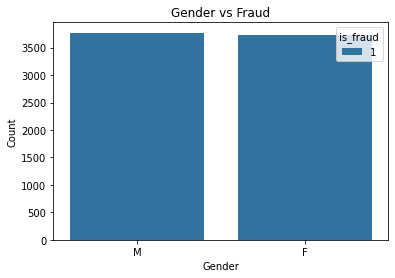

In [47]:
# plotting countplot
sns.countplot(data=train_data1, x='gender', hue='is_fraud')
plt.title('Gender vs Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [48]:
# gender vs fraudulent_amount
gender = train_data1.groupby(by="gender")['amount'].sum().sort_values(ascending=False).reset_index()
gender = pd.DataFrame(gender, columns=['gender','amount'])
gender.head()

,gender,amount
0,M,2142801.27
1,F,1845287.34


**Observations:**
- Both Males and Females are almost equally Frauded. Thus, difficult to come to a conclusion who defaults more.

- Fraudulent amount transacted by Male is 💲2,142,801.27, by Female is 💲1,845,287.34
___

**category vs fraudulent_transactions**

In [49]:
# category with highest no of frauds
train_data1['category'].value_counts()

grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64

In [50]:
# category vs fraudulent_amount
category = train_data1.groupby(by="category")['amount'].sum().sort_values(ascending=False).reset_index()
category = pd.DataFrame(category, columns=['category','amount'])
category.head()

,category,amount
0,shopping_net,1711723.71
1,shopping_pos,739245.09
2,misc_net,729266.76
3,grocery_pos,543797.90
4,entertainment,117323.79


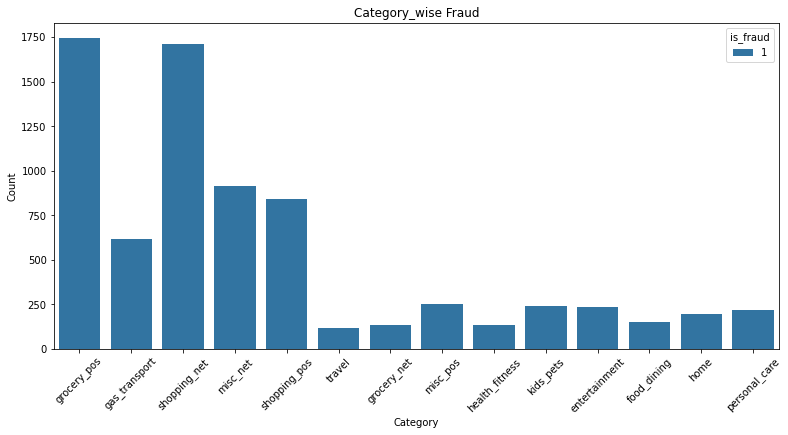

In [51]:
# plotting
plt.figure(figsize=(13,6))
plt.title('Category_wise Fraud')
sns.countplot(data=train_data1, x='category', hue='is_fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Majority of the (count of) frauduent transactions have been done on `grocery_pos category` follwed by `shopping_net` and misc_net and so on.
- But when we see the fradulent transaction amount then `shopping_net category` tops the list with 💲1,711,723.71, followed by `shopping_pos category` with 💲739,245.09.
___

**age_group vs fraudulent_transaction**

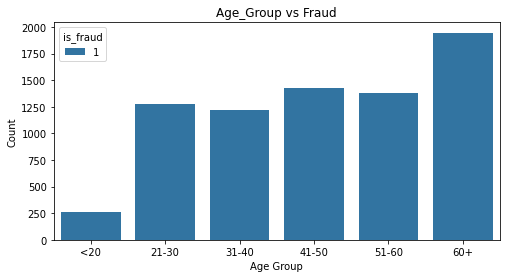

In [52]:
# plotting
plt.figure(figsize=(8,4))
sns.countplot(data=train_data1, x='age_group', hue='is_fraud')
plt.title('Age_Group vs Fraud')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [53]:
# age_group vs fraudulent_amount
age_group = train_data1.groupby(by="age_group")['amount'].sum().sort_values(ascending=False).reset_index()
age_group = pd.DataFrame(age_group, columns=['age_group','amount'])
age_group.head()

,age_group,amount
0,60+,1109239.70
1,51-60,768487.86
2,41-50,682124.40
3,21-30,673608.50
4,31-40,598950.94


**Observations:**
- Majority of the people who are victims of fraudulent transactions (by count) come under the age group of `60+ years` with `total amount of 💲1,109,239.70` followed by `41-50 years` `total amount of 💲768,487.86`.  
___

**Fraudulent transaction weekday and time(hours)**

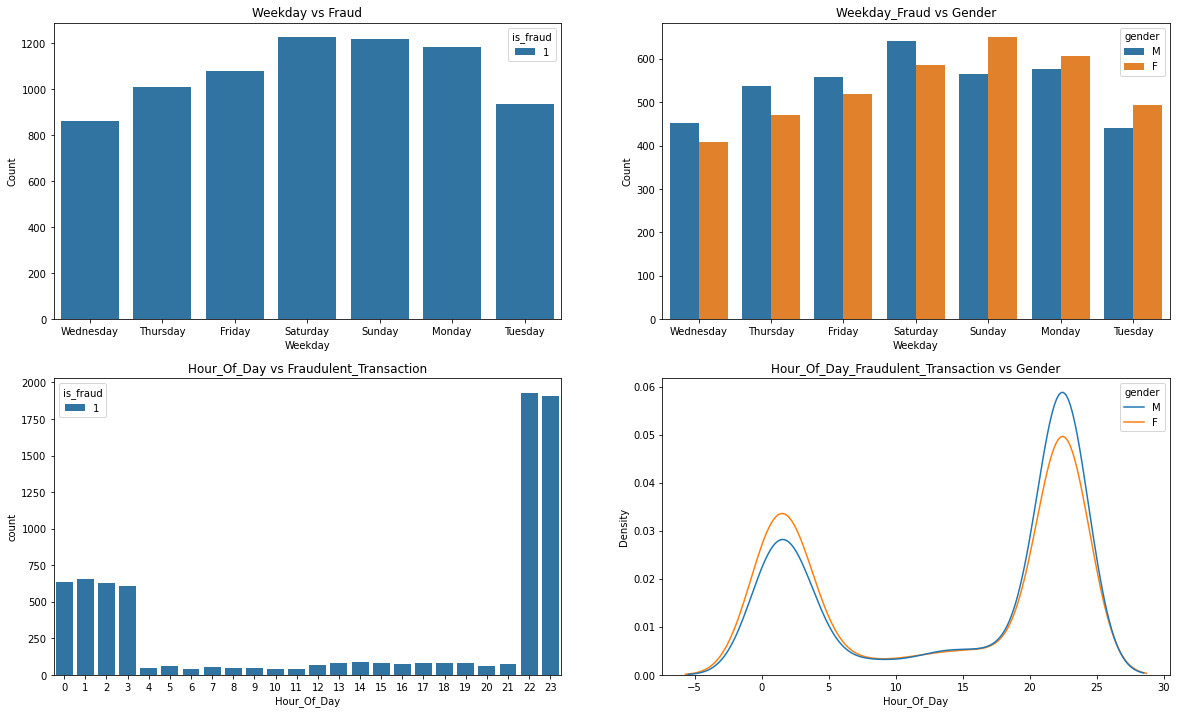

In [54]:
#transaction_day_of_week hour
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.title('Weekday vs Fraud')
sns.countplot(data=train_data1, x='transaction_day_of_week', hue='is_fraud')
plt.xlabel('Weekday')
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.countplot(data=train_data1, x='transaction_day_of_week', hue='gender')
plt.title('Weekday_Fraud vs Gender')
plt.xlabel('Weekday')
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.countplot(data=train_data1, x='transaction_hour', hue='is_fraud')
plt.title('Hour_Of_Day vs Fraudulent_Transaction')
plt.xlabel('Hour_Of_Day')

plt.subplot(2,2,4)
sns.kdeplot(data=train_data1, x='transaction_hour', hue='gender')
plt.title('Hour_Of_Day_Fraudulent_Transaction vs Gender')
plt.xlabel('Hour_Of_Day')

plt.show()

In [55]:
# week vs fraudulent_amount
week = train_data1.groupby(by=['transaction_day_of_week'])['amount'].sum().sort_values(ascending=False).reset_index()
week = pd.DataFrame(week, columns=['transaction_day_of_week','amount'])
print(week)

#hour vs fraudulent_amount
hour = train_data1.groupby(by=['transaction_hour'])['amount'].sum().sort_values(ascending=False).reset_index()
hour = pd.DataFrame(hour, columns=['transaction_hour','amount'])
print('\n',hour)

  transaction_day_of_week     amount
0                  Sunday  663864.01
1                Saturday  636539.35
2                  Monday  610146.66
3                  Friday  581816.53
4                Thursday  544490.00
5                 Tuesday  501650.80
6               Wednesday  449581.26

     transaction_hour      amount
0                 22  1274662.84
1                 23  1209673.61
2                  1   230736.79
3                  2   222377.08
4                  0   218345.21
5                  3   211153.52
6                 14    61338.04
7                 19    52445.53
8                 18    50594.97
9                 21    49273.69
10                17    48976.42
11                15    48567.33
12                13    47843.40
13                16    47250.76
14                20    44910.50
15                12    42313.67
16                 7    20314.37
17                 5    18739.17
18                 8    16400.34
19                10    16397.40
20       

**Observations:**
- Most of the fraudulent transactions are observed during weekend i.e. `(Saturday and Sunday)` with most transactions are registered by `Males on Saturday` and `Females on Sunday`.

  Sunday total amount: 💲663,864.01

  Saturday total amount: 💲636,539.35

- Most of the fraudulent transactions are observed during odd hours i.e. `early morning (0-3am)` and `late night (22-23pm [10-11pm)` by both the genders.
___

**Fradulent_Transactions vs Year and Month**

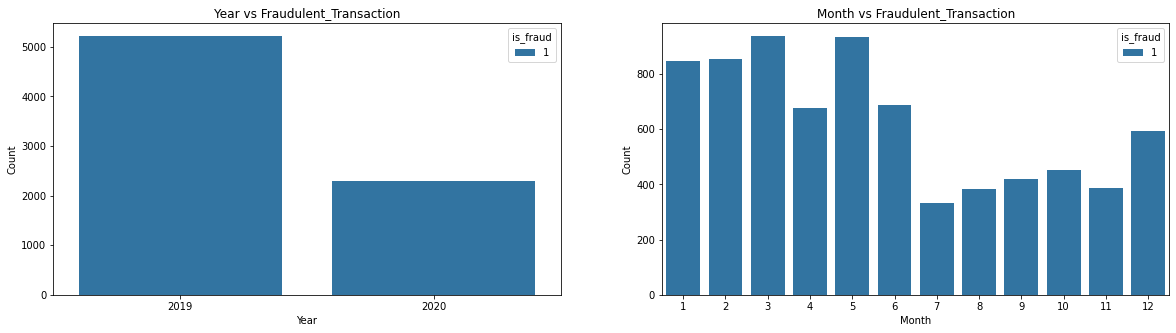

In [56]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(x=train_data1['transaction_date_time'].dt.year, hue=train_data1['is_fraud'])
plt.title('Year vs Fraudulent_Transaction')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x=train_data1['transaction_date_time'].dt.month, hue=train_data1['is_fraud'])
plt.title('Month vs Fraudulent_Transaction')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

In [57]:
train_data1['year']=train_data1['transaction_date_time'].dt.year
train_data1['month']=train_data1['transaction_date_time'].dt.month

# year vs fraudulent_amount
year = train_data1.groupby(by=['year'])['amount'].sum().sort_values(ascending=False).reset_index()
year = pd.DataFrame(year, columns=['year','amount'])
print(year)

# month vs fraudulent_amount
month = train_data1.groupby(by=['month'])['amount'].sum().sort_values(ascending=False).reset_index()
month = pd.DataFrame(month, columns=['month','amount'])
print('\n',month)

   year      amount
0  2019  2767822.87
1  2020  1220265.74

     month     amount
0       5  497775.49
1       3  471727.69
2       2  458001.19
3       1  444375.74
4       6  358434.41
5       4  354241.27
6      12  335157.54
7      10  257739.72
8       9  217675.37
9       8  203951.13
10     11  200307.47
11      7  188701.59


**Observations:**
- `Year 2019` registered maximum fraudulent transactions with total amount of 💲2,767,822.87.
- Month `5(May)` amount 💲497,775.49 and `3(March)` amount 💲471,727.69 have registered maximum fraudulent transactions.
___

In [58]:
train_data1 = train_data1.drop(['year','month'], axis=1)

**States vs Frauds**

In [59]:
# top 10 states with highest frauds
train_data1['state'].value_counts().head(10)

NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: state, dtype: int64

In [60]:
# state vs fraudulent_amount
state = train_data1.groupby(by="state")['amount'].sum().sort_values(ascending=False).reset_index()
state = pd.DataFrame(state, columns=['state','amount'])
state.head()

,state,amount
0,NY,295548.64
1,TX,265806.41
2,PA,244624.67
3,CA,170943.92
4,OH,168919.98


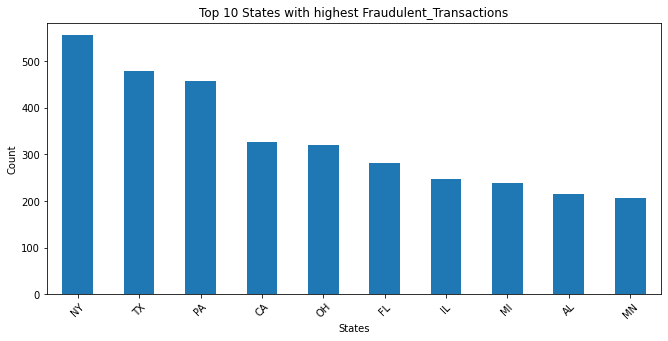

In [61]:
# plotting
plt.figure(figsize=[11,5]),

train_data1['state'].value_counts().head(10).plot.bar()
plt.title('Top 10 States with highest Fraudulent_Transactions')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

**Observations:**
- `NY(NewYork)` and `TX(Texas)` have registered maximum number of fraudulent transactions followed by PA, CA and so on.
- The amount of Fraudulent transaction in `NewYork is 💲 295,548.64` whereas in `Texas` the amount is `💲265,806.41`.
___



**city vs fraudulent_transactions**

In [62]:
# top 10 cities with higest frauds
train_data1['city'].value_counts().head(10)

Houston       39
Warren        33
Huntsville    29
Naples        29
Dallas        27
Tulsa         27
Topeka        27
Detroit       26
Utica         25
Randolph      25
Name: city, dtype: int64

In [63]:
# city vs fraudulent_amount
city = train_data1.groupby(by="city")['amount'].sum().sort_values(ascending=False).reset_index()
city = pd.DataFrame(city, columns=['city','amount'])
city.head()

,city,amount
0,Houston,21667.21
1,Dallas,19747.14
2,Warren,18221.79
3,Tulsa,17470.25
4,Naples,17220.43


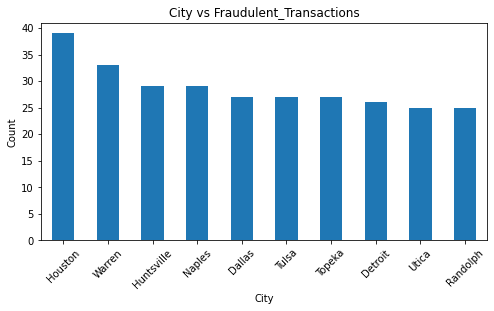

In [64]:
# plotting
plt.figure(figsize=(8,4))
train_data1['city'].value_counts().head(10).plot.bar()
plt.title('City vs Fraudulent_Transactions')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Most number of fradulent transactions (`by number`) happen in the city of `Houston` followed by `Warren` and so on.
- But in terms of `amount`,  `Houston with amount 💲21,667.21` tops the list followed by `Dallas with amount 💲19,747.14` and so on.
___

**merchant vs fraudulent_trasactions**

In [65]:
train_data1['merchant'].value_counts().head(10)

Rau and Sons       49
Cormier LLC        48
Kozey-Boehm        48
Doyle Ltd          47
Vandervort-Funk    47
Kilback LLC        47
Padberg-Welch      44
Kuhn LLC           44
Terry-Huel         43
Koepp-Witting      42
Name: merchant, dtype: int64

In [66]:
# merchant vs fraudulent_amount
merchant = train_data1.groupby(by='merchant')['amount'].sum().sort_values(ascending=False).reset_index()
merchant = pd.DataFrame(merchant, columns=['merchant', 'amount'])
merchant.head()

,merchant,amount
0,Kozey-Boehm,48189.98
1,Cormier LLC,44903.89
2,Jast Ltd,42560.34
3,Terry-Huel,42356.37
4,Goyette Inc,41580.84


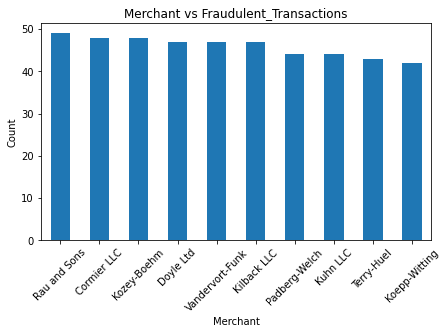

In [67]:
# plotting
plt.figure(figsize=(7,4))
train_data1['merchant'].value_counts().head(10).plot.bar()
plt.title('Merchant vs Fraudulent_Transactions')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Merchant `Rau and Sons` had most fraudulent transactions `by number` folowed by `Cormier LLC`.
- But in terms of `amount` `Kozey-Boehm with amount 💲48,189.98` tops the list followed by `Cormier LLC with amount of 💲44,903.89`.
____

**city_popuplation_segment vs fraudulent_transactions**

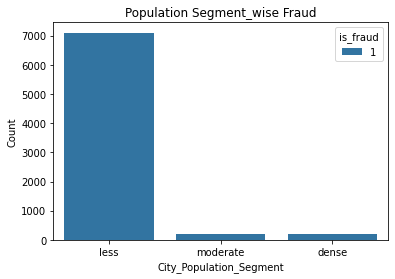

In [68]:
# plotting
sns.countplot(data=train_data1, x='city_pop_segment', hue='is_fraud')
plt.title('Population Segment_wise Fraud')
plt.xlabel('City_Population_Segment')
plt.ylabel('Count')
plt.show()

In [69]:
# city_population_segment vs fraudulent_amount
pop = train_data1.groupby(by='city_pop_segment')['amount'].sum().sort_values(ascending=False).reset_index()
pop = pd.DataFrame(pop, columns=['city_pop_segment', 'amount'])
pop.head()

,city_pop_segment,amount
0,less,3758412.25
1,moderate,117413.41
2,dense,112262.95


**Observation:**
- Most of the fradulent transactions occured in the cities with `less number of popuplation amount of 💲3,758,412.25` followed by `moderate with amount of 💲117,413.41` and so on.
___

**job vs fraudulent_transaction**

In [70]:
train_data1['job'].value_counts().head(10)

Materials engineer                       62
Trading standards officer                56
Naval architect                          53
Exhibition designer                      51
Surveyor, land/geomatics                 50
Mechanical engineer                      49
Prison officer                           48
Quantity surveyor                        48
Audiological scientist                   46
Senior tax professional/tax inspector    45
Name: job, dtype: int64

In [71]:
# job vs fraudulent_amount
job = train_data1.groupby(by='job')['amount'].sum().sort_values(ascending=False).reset_index()
job = pd.DataFrame(job, columns=['job', 'amount'])
job.head()

,job,amount
0,Materials engineer,34787.71
1,Naval architect,34638.89
2,Audiological scientist,30374.34
3,Quantity surveyor,28404.20
4,Senior tax professional/tax inspector,28331.54


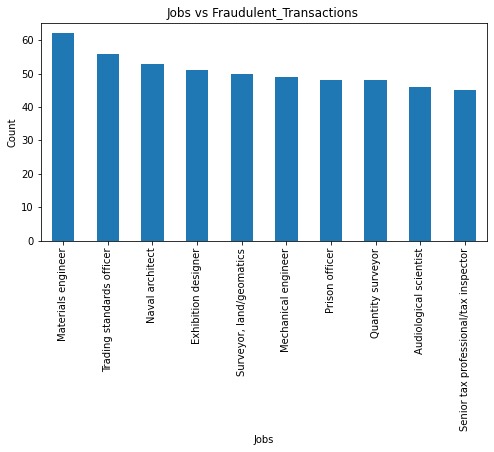

In [72]:
#plotting
plt.figure(figsize=(8,4))
train_data1['job'].value_counts().head(10).plot.bar()
plt.title('Jobs vs Fraudulent_Transactions ')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.show()

**Observations:**
- People who work at `Materials engineer` are most prone to fraud follwed by `Trading standards officer` etc by count.
- But in terms of `amount`, `Materials engineer with amount 💲34,787.71` tops the list followed by `Naval architect with amount 💲34,638.89`.  
___

**distance_segment vs fraudulent_transaction**

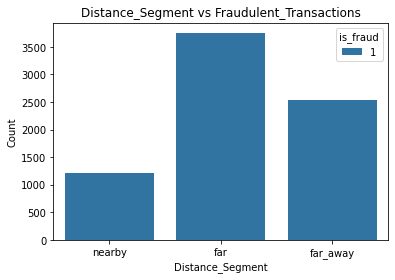

In [73]:
# plotting
sns.countplot(data=train_data1, x='distance_segment', hue='is_fraud')
plt.title('Distance_Segment vs Fraudulent_Transactions')
plt.xlabel("Distance_Segment")
plt.ylabel('Count')
plt.show()

In [74]:
# distance_segment vs fraudulent_amount
distance_segment = train_data1.groupby(by='distance_segment')['amount'].sum().sort_values(ascending=False).reset_index()
distance_segment = pd.DataFrame(distance_segment, columns=['distance_segment', 'amount'])
distance_segment.head()

,distance_segment,amount
0,far,1999519.24
1,far_away,1356256.90
2,nearby,631595.52


**Observations:**
- People who are `far amount 💲1,999,519.24'` from merchants locations are more prone to fraud followed by the people who are `far_away amount 💲1,356,256.90` from merchants locations.
___

### **EDA Observations:**

- The majority of the fraud is done with `amount less than $100`.
- Since the fraudulent amount is that less thus, may be little difficult to keep track of it.


- Both Males and Females are almost `equally Frauded`. Thus, difficult to come to a conclusion who defaults more.
- Fraudulent amount transacted by `Male is 💲2,142,801.27`.
by `Female is 💲1,845,287.34`


- Majority of the (count of) frauduent transactions have been done on `grocery_pos category` follwed by `shopping_net` and misc_net and so on.
- But when we see the fradulent transaction amount then `shopping_net category` tops the list with 💲1,711,723.71, followed by `shopping_pos category` with 💲739,245.09.


- Majority of the people who are victims of fraudulent transactions (by count) come under the age group of `60+ years` with `total amount of 💲1,109,239.70` followed by `41-50 years` `total amount of 💲768,487.86`.  


- Most of the fraudulent transactions are observed during weekend i.e. `(Saturday and Sunday)` with most transactions are registered by `Males on Saturday` and `Females on Sunday`.

  Sunday total amount: 💲663,864.01

  Saturday total amount: 💲636,539.35
- Most of the fraudulent transactions are observed during odd hours i.e. `early morning (0-3am)` and `late night (22-23pm [10-11pm)` by both the genders.
                                                                                                                           
- `Year 2019` registered maximum fraudulent transactions with total amount of 💲2,767,822.87.
- Month `5(May)` amount 💲497,775.49 and `3(March)` amount 💲471,727.69 have registered maximum fraudulent transactions.
                                                                                                                           
- `NY(NewYork)` and `TX(Texas)` have registered maximum number of fraudulent transactions followed by PA, CA and so on.
- The amount of Fraudulent transaction in `NewYork is 💲 295,548.64` whereas in `Texas` the amount is `💲265,806.41`.


- Most number of fradulent transactions (`by number`) happen in the city of `Houston` followed by `Warren` and so on.
- But in terms of `amount`,  `Houston	with amount 💲21,667.21` tops the list followed by `Dallas	with amount 💲19,747.14` and so on.
                                                                                                                           
- Merchant `Rau and Sons` had most fraudulent transactions `by number` folowed by `Cormier LLC`.
- But in terms of `amount` `Kozey-Boehm	with amount 💲 48,189.98` tops the list followed by `Cormier LLC with amount of 💲44,903.89`.
                                                                                                                           
- Most of the fradulent transactions occured in the cities with `less number of popuplation amount of 💲3,758,412.25` followed by `moderate with amount  of 💲117,413.41` and so on.
                                                                                                                           
- People who work at `Materials engineer` are most prone to fraud follwed by `Trading standards officer` etc by count.
- But in terms of `amount`, `Materials engineer	with amount 💲34,787.71` tops the list followed by `Naval architect	with amount 💲34,638.89`.  
                                                                                                                           
- People who are `far amount 💲1,999,519.24'` from merchants locations are more prone to fraud followed by the people who are `far_away amount 💲1,356,256.90` from merchants locations.

In [75]:
# looking at unique values
train_data.nunique()

transaction_date_time      1274791
credit_card_number             983
merchant                       693
category                        14
amount                       52928
first_name                     352
last_name                      481
gender                           2
street                         983
city                           894
state                           51
zip                            970
latitude                       968
longitude                      969
city_pop                       879
job                            494
dob                            968
transaction_id             1296675
unix_time                  1274823
merchant_latitude          1247805
merchant_longitude         1275745
is_fraud                         2
age                             83
age_group                        6
transaction_hour                24
transaction_day_of_week          7
transaction_year_month          18
distance                       156
distance_segment    

In [76]:
# correlation matrix
corr = train_data.corr()
corr

,credit_card_number,amount,zip,latitude,longitude,city_pop,unix_time,merchant_latitude,merchant_longitude,is_fraud,age,transaction_hour,distance
credit_card_number,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981,-0.001048,-0.000801,-0.000571
amount,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,-0.009750,-0.022811,-0.001238
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.010604,0.005938,-0.001608
latitude,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,0.048103,-0.011508,0.000212
longitude,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,-0.029823,-0.002290,0.001717
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,-0.092655,0.020381,-0.000207
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,0.019796,0.000756,-0.000980
merchant_latitude,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,0.047715,-0.011378,0.000097
merchant_longitude,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,-0.029746,-0.002325,0.001750
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000,0.012272,0.013799,0.000427


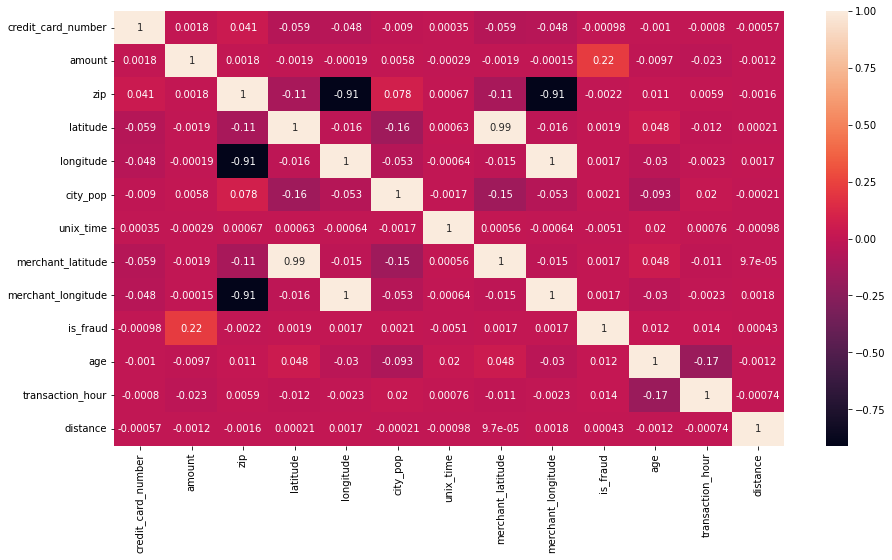

In [77]:
# plotting heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [78]:
# dropping columns no longer required
train_data2 = train_data.drop(['transaction_date_time','transaction_year_month', 'credit_card_number', 'first_name', 'last_name', 'street', 'city', 'zip', 'latitude', 'longitude',
                              'city_pop', 'merchant', 'dob', 'transaction_id', 'unix_time', 'merchant_latitude', 'merchant_longitude', 'age', 'distance',
                              'job','state'], axis=1)

In [79]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   category                 1296675 non-null  object  
 1   amount                   1296675 non-null  float64 
 2   gender                   1296675 non-null  object  
 3   is_fraud                 1296675 non-null  int64   
 4   age_group                1296675 non-null  category
 5   transaction_hour         1296675 non-null  int64   
 6   transaction_day_of_week  1296675 non-null  object  
 7   distance_segment         1296585 non-null  category
 8   city_pop_segment         1296675 non-null  category
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 63.1+ MB


In [80]:
# storings the columns in new_vars
new_vars = ['category','amount','is_fraud','age_group','transaction_hour','transaction_day_of_week','distance_segment','city_pop_segment']

In [81]:
# looking at dimensions
train_data.shape

(1296675, 30)

In [82]:
# looking at dimensions
train_data2.shape

(1296675, 9)

**creating dummies**

In [83]:
dummy = pd.get_dummies(train_data2[['category', 'gender', 'age_group','transaction_day_of_week', 'distance_segment', 'city_pop_segment']],
                                  drop_first=True)

# adding results to train_data
train_data2 = pd.concat([train_data2, dummy],axis=1)

In [84]:
# looking at columns afer creating dummies
train_data2.columns

Index(['category', 'amount', 'gender', 'is_fraud', 'age_group',
       'transaction_hour', 'transaction_day_of_week', 'distance_segment',
       'city_pop_segment', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'age_group_21-30', 'age_group_31-40', 'age_group_41-50',
       'age_group_51-60', 'age_group_60+', 'transaction_day_of_week_Monday',
       'transaction_day_of_week_Saturday', 'transaction_day_of_week_Sunday',
       'transaction_day_of_week_Thursday', 'transaction_day_of_week_Tuesday',
       'transaction_day_of_week_Wednesday', 'distance_segment_far',
       'distance_segment_far_away', 'city_pop_segment_moderate',
       'city_pop_segment_dense'],
      dtype='object')

In [85]:
# We have created dummies for the below variables, so we can drop them
train_data2 = train_data2.drop(['category', 'gender', 'age_group','transaction_day_of_week', 'distance_segment', 'city_pop_segment'], axis=1)

In [86]:
# looking at all the columns
train_data2.columns

Index(['amount', 'is_fraud', 'transaction_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'age_group_21-30', 'age_group_31-40', 'age_group_41-50',
       'age_group_51-60', 'age_group_60+', 'transaction_day_of_week_Monday',
       'transaction_day_of_week_Saturday', 'transaction_day_of_week_Sunday',
       'transaction_day_of_week_Thursday', 'transaction_day_of_week_Tuesday',
       'transaction_day_of_week_Wednesday', 'distance_segment_far',
       'distance_segment_far_away', 'city_pop_segment_moderate',
       'city_pop_segment_dense'],
      dtype='object')

In [87]:
# looking at dimensions
train_data2.shape

(1296675, 32)

In [88]:
#top 5 rows
train_data2.head()

,amount,is_fraud,transaction_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,transaction_day_of_week_Monday,transaction_day_of_week_Saturday,transaction_day_of_week_Sunday,transaction_day_of_week_Thursday,transaction_day_of_week_Tuesday,transaction_day_of_week_Wednesday,distance_segment_far,distance_segment_far_away,city_pop_segment_moderate,city_pop_segment_dense
0,4.97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,107.23,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,220.11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,45.00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,41.96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


## **3) Train/Test Data Splitting**

In [89]:
# importing library
from sklearn.model_selection import train_test_split

In [90]:
# creating X and y variables
X = train_data2.drop('is_fraud', axis=1)
y = train_data2['is_fraud']

In [91]:
# top 5 rows
X.head()

,amount,transaction_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,...,transaction_day_of_week_Monday,transaction_day_of_week_Saturday,transaction_day_of_week_Sunday,transaction_day_of_week_Thursday,transaction_day_of_week_Tuesday,transaction_day_of_week_Wednesday,distance_segment_far,distance_segment_far_away,city_pop_segment_moderate,city_pop_segment_dense
0,4.97,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,107.23,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,220.11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,45.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,41.96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [92]:
# top 5 rows
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [93]:
# dimension of x and y
X.shape, y.shape

((1296675, 31), (1296675,))

In [94]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=56)

In [95]:
#dimension
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((907672, 31), (389003, 31), (907672,), (389003,))

#### **Feature Scaling**

In [96]:
#importing library
from sklearn.preprocessing import StandardScaler

In [97]:
# scaling the features
scaler = StandardScaler()
X_train[['amount', 'transaction_hour']] = scaler.fit_transform(X_train[['amount', 'transaction_hour']])
X_train.head()

,amount,transaction_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,...,transaction_day_of_week_Monday,transaction_day_of_week_Saturday,transaction_day_of_week_Sunday,transaction_day_of_week_Thursday,transaction_day_of_week_Tuesday,transaction_day_of_week_Wednesday,distance_segment_far,distance_segment_far_away,city_pop_segment_moderate,city_pop_segment_dense
641317,-0.172316,1.349029,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
387277,0.104604,0.468991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
304003,-0.412094,0.468991,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1129822,-0.098581,-1.877775,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
372757,0.184550,1.055683,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### **Data Imbalance Check**

In [98]:
# looing at the distribution
train_data2['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

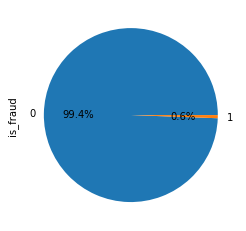

In [99]:
# plotting pie chart to see the distribution
(train_data2['is_fraud'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
plt.show()


*   Data is **`highly imbalanced`**.
*   Only 0.6% of the transaction is fraudulent where as remaining 99.4% transactions are genuine.

- Since data is highly imbalanced, so `accuracy metrics is ruled out` for model evaluation. So, we'll use **recall** and precision  for evaluation`, `recall specifically` as we need the fradulent transaction to be identified correctly.
--- 



We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques:

1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method


---




## **4) Model Building** 

#### **Logistic Regression**



In [100]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

___
**Model Number: 1 (Logistic Regression Base)**



In [101]:
# logistic regression model (Base) without handling data imbalance

# initialize
lreg = LogisticRegression()
#fitting the model
lreg.fit(X_train, y_train)

# predicting on test
y_pred = lreg.predict(X_test)

In [102]:
# looking at evaluation metric
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.027971506646478305
F1 score:  0.011502606386037928
Recall:  0.9769094138543517
Precision:  0.005785363031530229

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.02      0.04    386751
           1       0.01      0.98      0.01      2252

    accuracy                           0.03    389003
   macro avg       0.50      0.50      0.03    389003
weighted avg       0.99      0.03      0.04    389003


 confussion matrix:
 [[  8681 378070]
 [    52   2200]]


___
**Model Number: 2 (Logistic Regression Random_UnderSampling)**

In [103]:
# Random Undersampling

#importing library
from imblearn.under_sampling import RandomUnderSampler

#initialize
under_sample = RandomUnderSampler(random_state = 5)
#fitting
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

10508

In [104]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 5254), (1, 5254)]


In [105]:
# applying on logistic regression
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))


Accuracy:  0.010370099973522055
F1 score:  0.011564344640064908
Recall:  1.0
Precision:  0.005815800279426994

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01    386751
           1       0.01      1.00      0.01      2252

    accuracy                           0.01    389003
   macro avg       0.50      0.50      0.01    389003
weighted avg       0.99      0.01      0.01    389003


 confussion matrix:
 [[  1782 384969]
 [     0   2252]]


___
**Model Number: 3 (Logistic Regression Random_OverSampling)**

In [107]:
# Random OverSampling

#importing library
from imblearn.over_sampling import RandomOverSampler

#initialize
over_sample = RandomOverSampler(sampling_strategy = 1)

#fitting
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

1804836

In [108]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 902418), (1, 902418)]


In [109]:
# applying on logistic regression
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [110]:
# looking at evaluation metric
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))


Accuracy:  0.010483209641056753
F1 score:  0.011565651248366197
Recall:  1.0
Precision:  0.0058164612050819135

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01    386751
           1       0.01      1.00      0.01      2252

    accuracy                           0.01    389003
   macro avg       0.50      0.50      0.01    389003
weighted avg       0.99      0.01      0.01    389003


 confussion matrix:
 [[  1826 384925]
 [     0   2252]]


___
**Model Number: 4 (Logistic Regression SMOTE)**

In [111]:
# SMOTE

#importing lobrary
from imblearn.over_sampling import SMOTE

#initialize
smt = SMOTE(random_state=45, k_neighbors=5)

#fit
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

1804836

In [112]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 902418), (1, 902418)]


In [113]:
# applying logistic regression
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [114]:
# looking at evaluation metric
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))


Accuracy:  0.013331516723521413
F1 score:  0.011598651630996005
Recall:  1.0
Precision:  0.005833154177103056

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02    386751
           1       0.01      1.00      0.01      2252

    accuracy                           0.01    389003
   macro avg       0.50      0.50      0.01    389003
weighted avg       0.99      0.01      0.02    389003


 confussion matrix:
 [[  2934 383817]
 [     0   2252]]


___
**Model Number: 5 (Logistic Regression ADASYN)**

In [115]:
# ADASYN

#imporitng library
from imblearn.over_sampling import ADASYN

#initialize
ada = ADASYN(random_state=45, n_neighbors=5)

#fit
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

1805787

In [116]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 902418), (1, 903369)]


In [117]:
# applying on logistic regression
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [118]:
# looking at evaluation metric
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))


Accuracy:  0.013110438736976322
F1 score:  0.011596083489741432
Recall:  1.0
Precision:  0.0058318550840983545

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01    386751
           1       0.01      1.00      0.01      2252

    accuracy                           0.01    389003
   macro avg       0.50      0.50      0.01    389003
weighted avg       0.99      0.01      0.01    389003


 confussion matrix:
 [[  2848 383903]
 [     0   2252]]


___
#### **Decision Tree**

**Model Number: 6 (Decision Tree Base)**

In [119]:
# Decision Trees - Base

#importing library
from sklearn.tree import DecisionTreeClassifier

#initialize
dtc = DecisionTreeClassifier(random_state=0)
#fit
dtc.fit(X_train, y_train)
#predicting on test
y_pred_dtc = dtc.predict(X_test)

In [120]:
# lookig at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))


Accuracy:  0.9189517818628649
F1 score:  0.0006973058637083993
Recall:  0.004884547069271759
Precision:  0.00037545224930029354

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.92    389003
   macro avg       0.50      0.46      0.48    389003
weighted avg       0.99      0.92      0.95    389003


 confussion matrix:
 [[357464  29287]
 [  2241     11]]


___
**Model Number: 7 (Decision Tree Random_UnderSampling)**

In [121]:
# Decision Trees - Random UnderSampling

from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [122]:
#looking at evaluation metric
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))


Accuracy:  0.8701115415562348
F1 score:  0.0020934963363814113
Recall:  0.023534635879218474
Precision:  0.0010954713627250366

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93    386751
           1       0.00      0.02      0.00      2252

    accuracy                           0.87    389003
   macro avg       0.50      0.45      0.47    389003
weighted avg       0.99      0.87      0.93    389003


 confussion matrix:
 [[338423  48328]
 [  2199     53]]


___
**Model Number: 8 (Decision Tree Random_OverSampling)**

In [123]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [124]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))


Accuracy:  0.9508101479937173
F1 score:  0.0008354655109393765
Recall:  0.003552397868561279
Precision:  0.0004734007929463282

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.95    389003
   macro avg       0.50      0.48      0.49    389003
weighted avg       0.99      0.95      0.97    389003


 confussion matrix:
 [[369860  16891]
 [  2244      8]]


___
**Model Number: 9 (Decision Tree SMOTE)**

In [125]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [126]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))


Accuracy:  0.9432497949887276
F1 score:  0.0004527755139002083
Recall:  0.002220248667850799
Precision:  0.00025209236664313804

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.94    389003
   macro avg       0.50      0.48      0.49    389003
weighted avg       0.99      0.94      0.97    389003


 confussion matrix:
 [[366922  19829]
 [  2247      5]]


___
**Model Number: 10 (Decision Tree ADASYN)**

In [127]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [128]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))


Accuracy:  0.9446379590902898
F1 score:  0.0006496519721577727
Recall:  0.003108348134991119
Precision:  0.00036273188931495494

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.94    389003
   macro avg       0.50      0.48      0.49    389003
weighted avg       0.99      0.94      0.97    389003


 confussion matrix:
 [[367460  19291]
 [  2245      7]]


___
#### **Random Forest**
**Model Number: 11 (Random Forest Base)**

In [129]:
# Random Forest - Base

#importing library
from sklearn.ensemble import RandomForestClassifier

#initialize
rf = RandomForestClassifier()
#fitting
rf.fit(X_train, y_train)
#predicting
y_pred_rf = rf.predict(X_test)

In [130]:
#looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))


Accuracy:  0.8812142836944702
F1 score:  0.03342676651466343
Recall:  0.35479573712255774
Precision:  0.017539623304210387

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94    386751
           1       0.02      0.35      0.03      2252

    accuracy                           0.88    389003
   macro avg       0.51      0.62      0.49    389003
weighted avg       0.99      0.88      0.93    389003


 confussion matrix:
 [[341996  44755]
 [  1453    799]]


___
**Model Number: 12 (Random Forest Random_UnderSampling)**

In [131]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [132]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))


Accuracy:  0.2547795261219065
F1 score:  0.013234348034760587
Recall:  0.8632326820603907
Precision:  0.006668290290159812

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40    386751
           1       0.01      0.86      0.01      2252

    accuracy                           0.25    389003
   macro avg       0.50      0.56      0.21    389003
weighted avg       0.99      0.25      0.40    389003


 confussion matrix:
 [[ 97166 289585]
 [   308   1944]]


___
**Model Number: 13 (Random Forest Random_OverSampling)**

In [133]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [134]:
#lookig at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))


Accuracy:  0.8614278038986846
F1 score:  0.027880471046509533
Recall:  0.3432504440497336
Precision:  0.014530348314817948

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93    386751
           1       0.01      0.34      0.03      2252

    accuracy                           0.86    389003
   macro avg       0.51      0.60      0.48    389003
weighted avg       0.99      0.86      0.92    389003


 confussion matrix:
 [[334325  52426]
 [  1479    773]]


___
**Model Number: 14 (Random Forest SMOTE)**

In [135]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [136]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))


Accuracy:  0.8607003030824955
F1 score:  0.020816769063968194
Recall:  0.2557726465364121
Precision:  0.0108499095840868

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93    386751
           1       0.01      0.26      0.02      2252

    accuracy                           0.86    389003
   macro avg       0.50      0.56      0.47    389003
weighted avg       0.99      0.86      0.92    389003


 confussion matrix:
 [[334239  52512]
 [  1676    576]]


___
**Model Number: 15 (Random Forest ADASYN)**

In [137]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [138]:
# looking at evaluation metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))


Accuracy:  0.8481297059405711
F1 score:  0.0219845710690991
Recall:  0.29484902309058614
Precision:  0.011417959211748117

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92    386751
           1       0.01      0.29      0.02      2252

    accuracy                           0.85    389003
   macro avg       0.50      0.57      0.47    389003
weighted avg       0.99      0.85      0.91    389003


 confussion matrix:
 [[329261  57490]
 [  1588    664]]


___
- We'll move ahead with model : **`Logistic Regression SMOTE`**. As, it fullfills our model selection requirement.
___

In [140]:
#importing library
from sklearn.feature_selection import RFE
rfe = RFE(estimator = lreg_smt, n_features_to_select= 15)
rfe_res = rfe.fit(X_train,y_train)

In [141]:
# columns which were selected by RFE
X_train.columns[rfe_res.support_]

Index(['amount', 'transaction_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'age_group_51-60',
       'age_group_60+'],
      dtype='object')

In [142]:
# let's check the support columns rankings
#list(zip(X_test_data.columns,rfe.support_,rfe.ranking_))

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amount,0.578725
1,transaction_hour,0.137755
5,category_grocery_pos,0.061107
3,category_gas_transport,0.021551
20,age_group_60+,0.020514
19,age_group_51-60,0.018190
15,gender_M,0.017141
9,category_misc_net,0.015286
12,category_shopping_net,0.012628
10,category_misc_pos,0.012627


In [143]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('amount', True, 1),
 ('transaction_hour', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', False, 2),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 3),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', False, 5),
 ('age_group_21-30', False, 8),
 ('age_group_31-40', False, 11),
 ('age_group_41-50', False, 14),
 ('age_group_51-60', True, 1),
 ('age_group_60+', True, 1),
 ('transaction_day_of_week_Monday', False, 4),
 ('transaction_day_of_week_Saturday', False, 10),
 ('transaction_day_of_week_Sunday', False, 6),
 ('transaction_day_of_week_Thursday', False, 16),
 ('transaction_day_of_week_Tuesday', False, 9),
 ('transaction_day_of_week_Wednesday', False, 17),
 ('distance

#### **Test Dataset**

In [144]:
# top 5 rows
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [145]:
# dimensions
test_data.shape

(555719, 23)

In [146]:
# Making necessary changes on test_data

# dropping the 'Unnamed: 0' column
test_data = test_data.drop('Unnamed: 0', axis=1)

# renaming columns for better understanding
test_data.rename(columns = {"trans_date_trans_time":"transaction_date_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount",
                         "first":"first_name",
                         "last":"last_name",
                         "lat":"latitude",
                         "long":"longitude",
                         "trans_num":"transaction_id",
                         "merch_lat":"merchant_latitude",
                         "merch_long":"merchant_longitude"},
                inplace=True)

# converting 'trans_date_trans_time' and 'dob' into datetime format
test_data['transaction_date_time'] = pd.to_datetime(test_data['transaction_date_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])


# Extracting age from dob column
test_data['age'] = np.round((test_data['transaction_date_time'] - test_data['dob'])/np.timedelta64(1, 'Y')) #see numpy lib doc "https://numpy.org/doc/stable/reference/arrays.datetime.html"
test_data['age'] = test_data['age'].astype(int)

# creating new column age_group by binnig age
test_data['age_group'] = pd.cut(test_data.age, [0,20,30,40,50,60,99], labels=['<20','21-30','31-40','41-50','51-60','60+'])
test_data.head()


#extracting 'transaction_hour' from transaction_date_time column
test_data['transaction_hour'] = test_data['transaction_date_time'].dt.hour

#extracting 'day of the week' from transaction_date_time column
test_data['transaction_day_of_week'] = test_data['transaction_date_time'].dt.day_name()

#extracting 'year_month' from transaction_date_time column
test_data['transaction_year_month'] = test_data['transaction_date_time'].dt.to_period('M')


# calulating distance from customer to merchant
lat_diff = abs(test_data['latitude'] - test_data['merchant_latitude'])
long_diff = abs(test_data['longitude'] - test_data['merchant_longitude'])

# between each degree of longitude and latitude is about 69 miles or 110 kilometers.
# apply pythagoras to calculate the displacement
test_data['distance'] = np.round(np.sqrt(pow(lat_diff*110,2)+pow(long_diff*110,2)),2)
test_data['distance'] = test_data['distance'].astype(int)


# ceating new column city_pop_segment from city_pop for better understanding
test_data['distance_segment'] = pd.cut(test_data.distance, [0,50,100,200], labels=['nearby','far','far_away'])

# ceating new column city_pop_segment from city_pop for better understanding
test_data['city_pop_segment'] = pd.cut(test_data.city_pop, [0,500000,1000000,5000000], labels=['less','moderate','dense'])

# dropping columns no longer required
test_data2 = test_data.drop(['transaction_date_time','transaction_year_month', 'credit_card_number', 'first_name', 'last_name', 'street', 'city', 'zip', 'latitude', 'longitude',
                              'city_pop', 'merchant', 'dob', 'transaction_id', 'unix_time', 'merchant_latitude', 'merchant_longitude', 'age', 'distance',
                              'job','state'], axis=1)
# 'transaction_year_month'

# creating dummies
dummy1 = pd.get_dummies(test_data2[['category', 'gender', 'age_group','transaction_day_of_week', 'distance_segment', 'city_pop_segment']],
                                  drop_first=True)

# adding results to train_data
test_data2 = pd.concat([test_data2, dummy1],axis=1)

# We have created dummies for the below variables, so we can drop them
test_data2 = test_data2.drop(['category', 'gender', 'age_group','transaction_day_of_week', 'distance_segment', 'city_pop_segment'], axis=1)

## **Step 5: Evaluating model on Test_Dataset**

In [147]:
# creating X and y variables
X_test_data = test_data2.drop('is_fraud', axis=1)
y_test_data = test_data2['is_fraud']

# scaling the features
scaler = StandardScaler()
X_test_data[['amount', 'transaction_hour']] = scaler.fit_transform(X_test_data[['amount', 'transaction_hour']])
X_test_data.head()

#predict
y_test_pred = lreg_smt.predict(X_test_data)

In [148]:
# assigning of values
predictions_test = pd.DataFrame({"Actual": y_test_data,"Pred_Prob" : y_test_pred})
predictions_test.head()

,Actual,Pred_Prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [149]:
predictions_test["Final"] = predictions_test["Pred_Prob"].map(lambda x: 0 if x<0.01 else 1)

In [150]:
# precision_score
precision_score(predictions_test["Actual"],predictions_test["Final"])

0.02774742902727919

In [151]:
#recall_score
recall_score(predictions_test["Actual"],predictions_test["Final"])

0.745920745920746

In [152]:
# classification_report
print(classification_report(predictions_test["Actual"],predictions_test["Final"]))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.75      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.82      0.50    555719
weighted avg       1.00      0.90      0.94    555719



___
- Our model has worked well on unseen (test) data quit well as we have achieved a recall value of 75% i.e our model is able recognize/identify fraudulent transaction as fraud when they are actually fradulent in 75% of the cases. 
___

In [153]:
# top 5 rows
predictions_test.head()

,Actual,Pred_Prob,Final
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [154]:
# creating year and month columns
test_data['year']=test_data['transaction_date_time'].dt.year
test_data['month']=test_data['transaction_date_time'].dt.month


In [155]:
# Combining date with predictions
predictions_test = pd.merge(test_data[["transaction_date_time","month","year"]],predictions_test,right_index=True,left_index= True)

In [156]:
# top 5 rows
predictions_test.head()

,transaction_date_time,month,year,Actual,Pred_Prob,Final
0,2020-06-21 12:14:25,6,2020,0,0,0
1,2020-06-21 12:14:33,6,2020,0,0,0
2,2020-06-21 12:14:53,6,2020,0,0,0
3,2020-06-21 12:15:15,6,2020,0,0,0
4,2020-06-21 12:15:17,6,2020,0,0,0


## **Step 6: Cost Benefit Analysis**

- Please also refer to the **`cost benefit analysis execl file`** provided. 

In [157]:
# Average Number of transactions per month
test_data["month"] = test_data["transaction_date_time"].dt.month
test_data["year"] = test_data["transaction_date_time"].dt.year
result1 = (test_data.groupby(by = ["year","month"]).count()).mean()
np.round(result1[1],2)

79388.43

In [158]:
#Average Number of Fraudulent transactions per month
result2 = (test_data[test_data["is_fraud"]==1].groupby(by = ["year","month"]).count()).mean()
result2[1]

306.42857142857144

In [159]:
#Average amount per fraud transaction
result3 = test_data[test_data["is_fraud"]==1]["amount"].sum()/test_data[test_data["is_fraud"]==1].count()
result3[1]

528.3564941724942

In [160]:
# Average number of transactions detected as fraud by the model,
TF = (predictions_test[(predictions_test["Final"]==1)].groupby(by=["year","month"]).count()).mean()[1]
TF

8237.57142857143

In [162]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

FN = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by=["year","month"]).count()).mean()[1]
FN

77.85714285714286

___
**Scope:**
- The Scope of this model is not limited to the models/algorithms done above. This project can further be explored using other algorithms like KNN,XGBoost etc.


___
- Additional files provided along with this document as part of project:

  1. Structured Problem Solving (excel file)   
  2. Root Cause Analysis (pdf file)
  3. Cost Benefit Analysis (excel file)
  4. PPT
  5. Video Presentation
___



                                             **PROJECT ENDS HERE**